# Proyecto 1: Clasificación de clientes de un banco
**Aprendizaje supervisado con Árboles de Decisión y KNN**

Yuu Ricardo Akachi Tanaka           |   A01351969

Pablo Monzón Terrazas               |   A01562619

Donnet Emmanuel Hernández Franco    |   A01352049

## 1. Importando Datos

In [ ]:
import pandas as pd
df=pd.read_csv("/content/Churn_Modelling.csv")
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


## 2. Análisis Descriptivo del dataset
* Estadística Descriptiva

In [ ]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


*  Forma del dataset (filas, columnas)

In [ ]:
df.shape

(10000, 14)

*  Datos nulos

In [ ]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

*  Tipo de Datos

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


Realizamos un paso de la limpieza de datos, en donde se borró las variables que no nos van a servir, en este caso "RowNumber", "CustomerId" y "Surname", para no crear información extra que no serán de utilidad.

In [ ]:
df = df.drop(["RowNumber", "CustomerId", "Surname"], axis=1)

*  Matriz de correlación

In [ ]:
# Mostrar valores de correlación (hint: corr)
corr_matrix=df.corr()
corr_matrix

<ipython-input-7-1eb67a527bf2>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix=df.corr()


,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
CreditScore,1.000000,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094
Age,-0.003965,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323
Tenure,0.000842,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001
Balance,0.006268,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533
NumOfProducts,0.012238,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820
HasCrCard,-0.005458,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138
IsActiveMember,0.025651,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128
EstimatedSalary,-0.001384,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097
Exited,-0.027094,0.285323,-0.014001,0.118533,-0.047820,-0.007138,-0.156128,0.012097,1.000000


*  Matriz de correlación en mapa de calor

<Axes: >

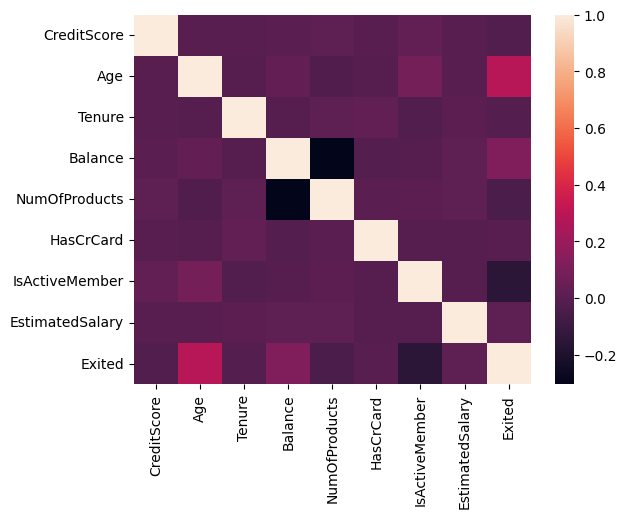

In [ ]:
import seaborn as sns
sns.heatmap(corr_matrix)

*  Boxplots

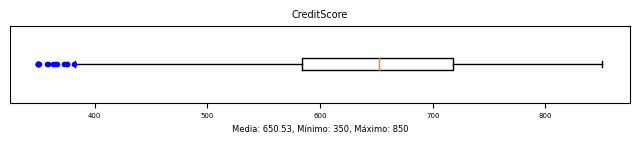

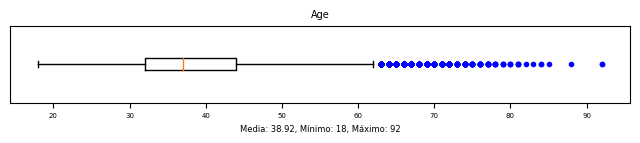

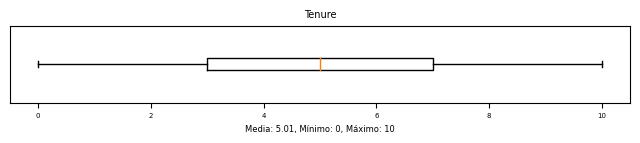

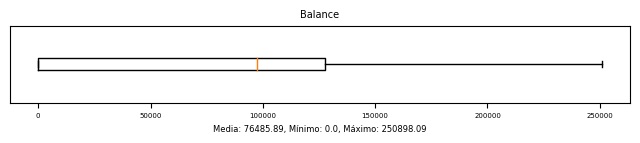

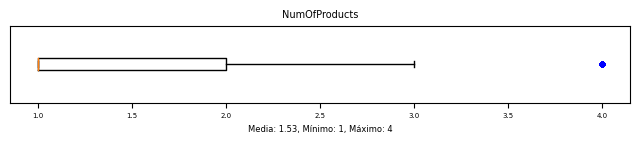

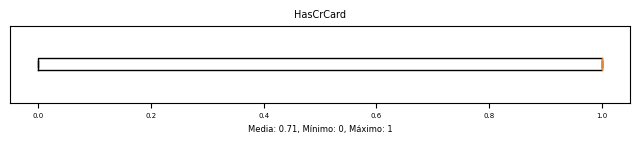

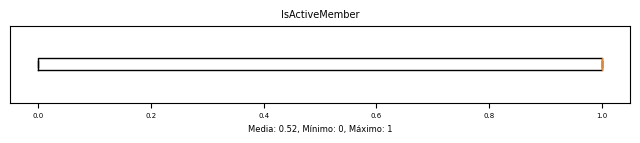

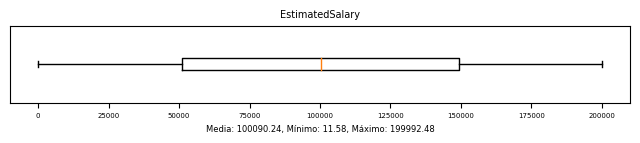

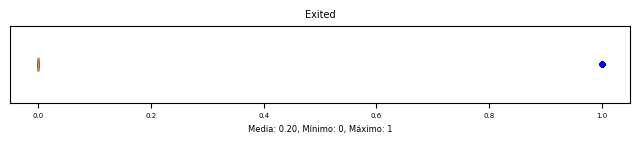

In [ ]:
# Boxplots de los atributos numéricos
import matplotlib.pyplot as plt
for column in df.select_dtypes(include=['int64', 'float64']):
    column_data = df[column]
    column_mean = column_data.mean()
    column_min = column_data.min()
    column_max = column_data.max()

    plt.figure(figsize=(8, 1))
    plt.boxplot(column_data, vert=False, sym='b.')
    plt.title(column, fontsize=7)
    plt.xlabel(f"Media: {column_mean:.2f}, Mínimo: {column_min}, Máximo: {column_max}", fontsize=6)
    plt.xticks(fontsize=5)
    plt.yticks([])
    plt.show()

*  Histograma

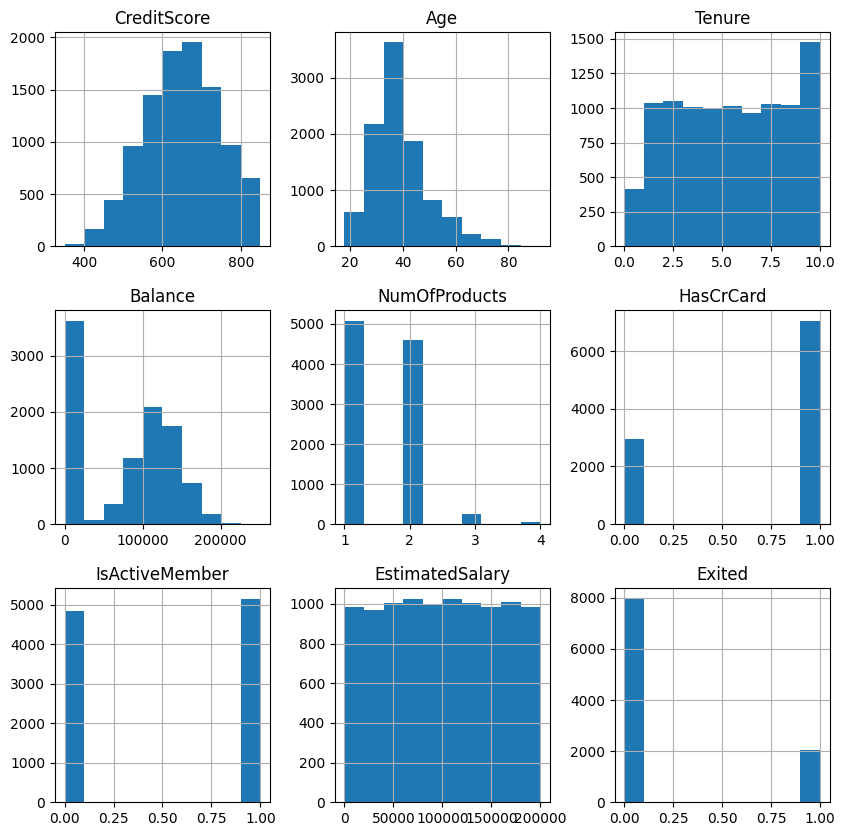

In [ ]:
import matplotlib.pyplot as plt

df.hist(figsize=(10,10))

plt.show()

*  Gráficos de dispersión

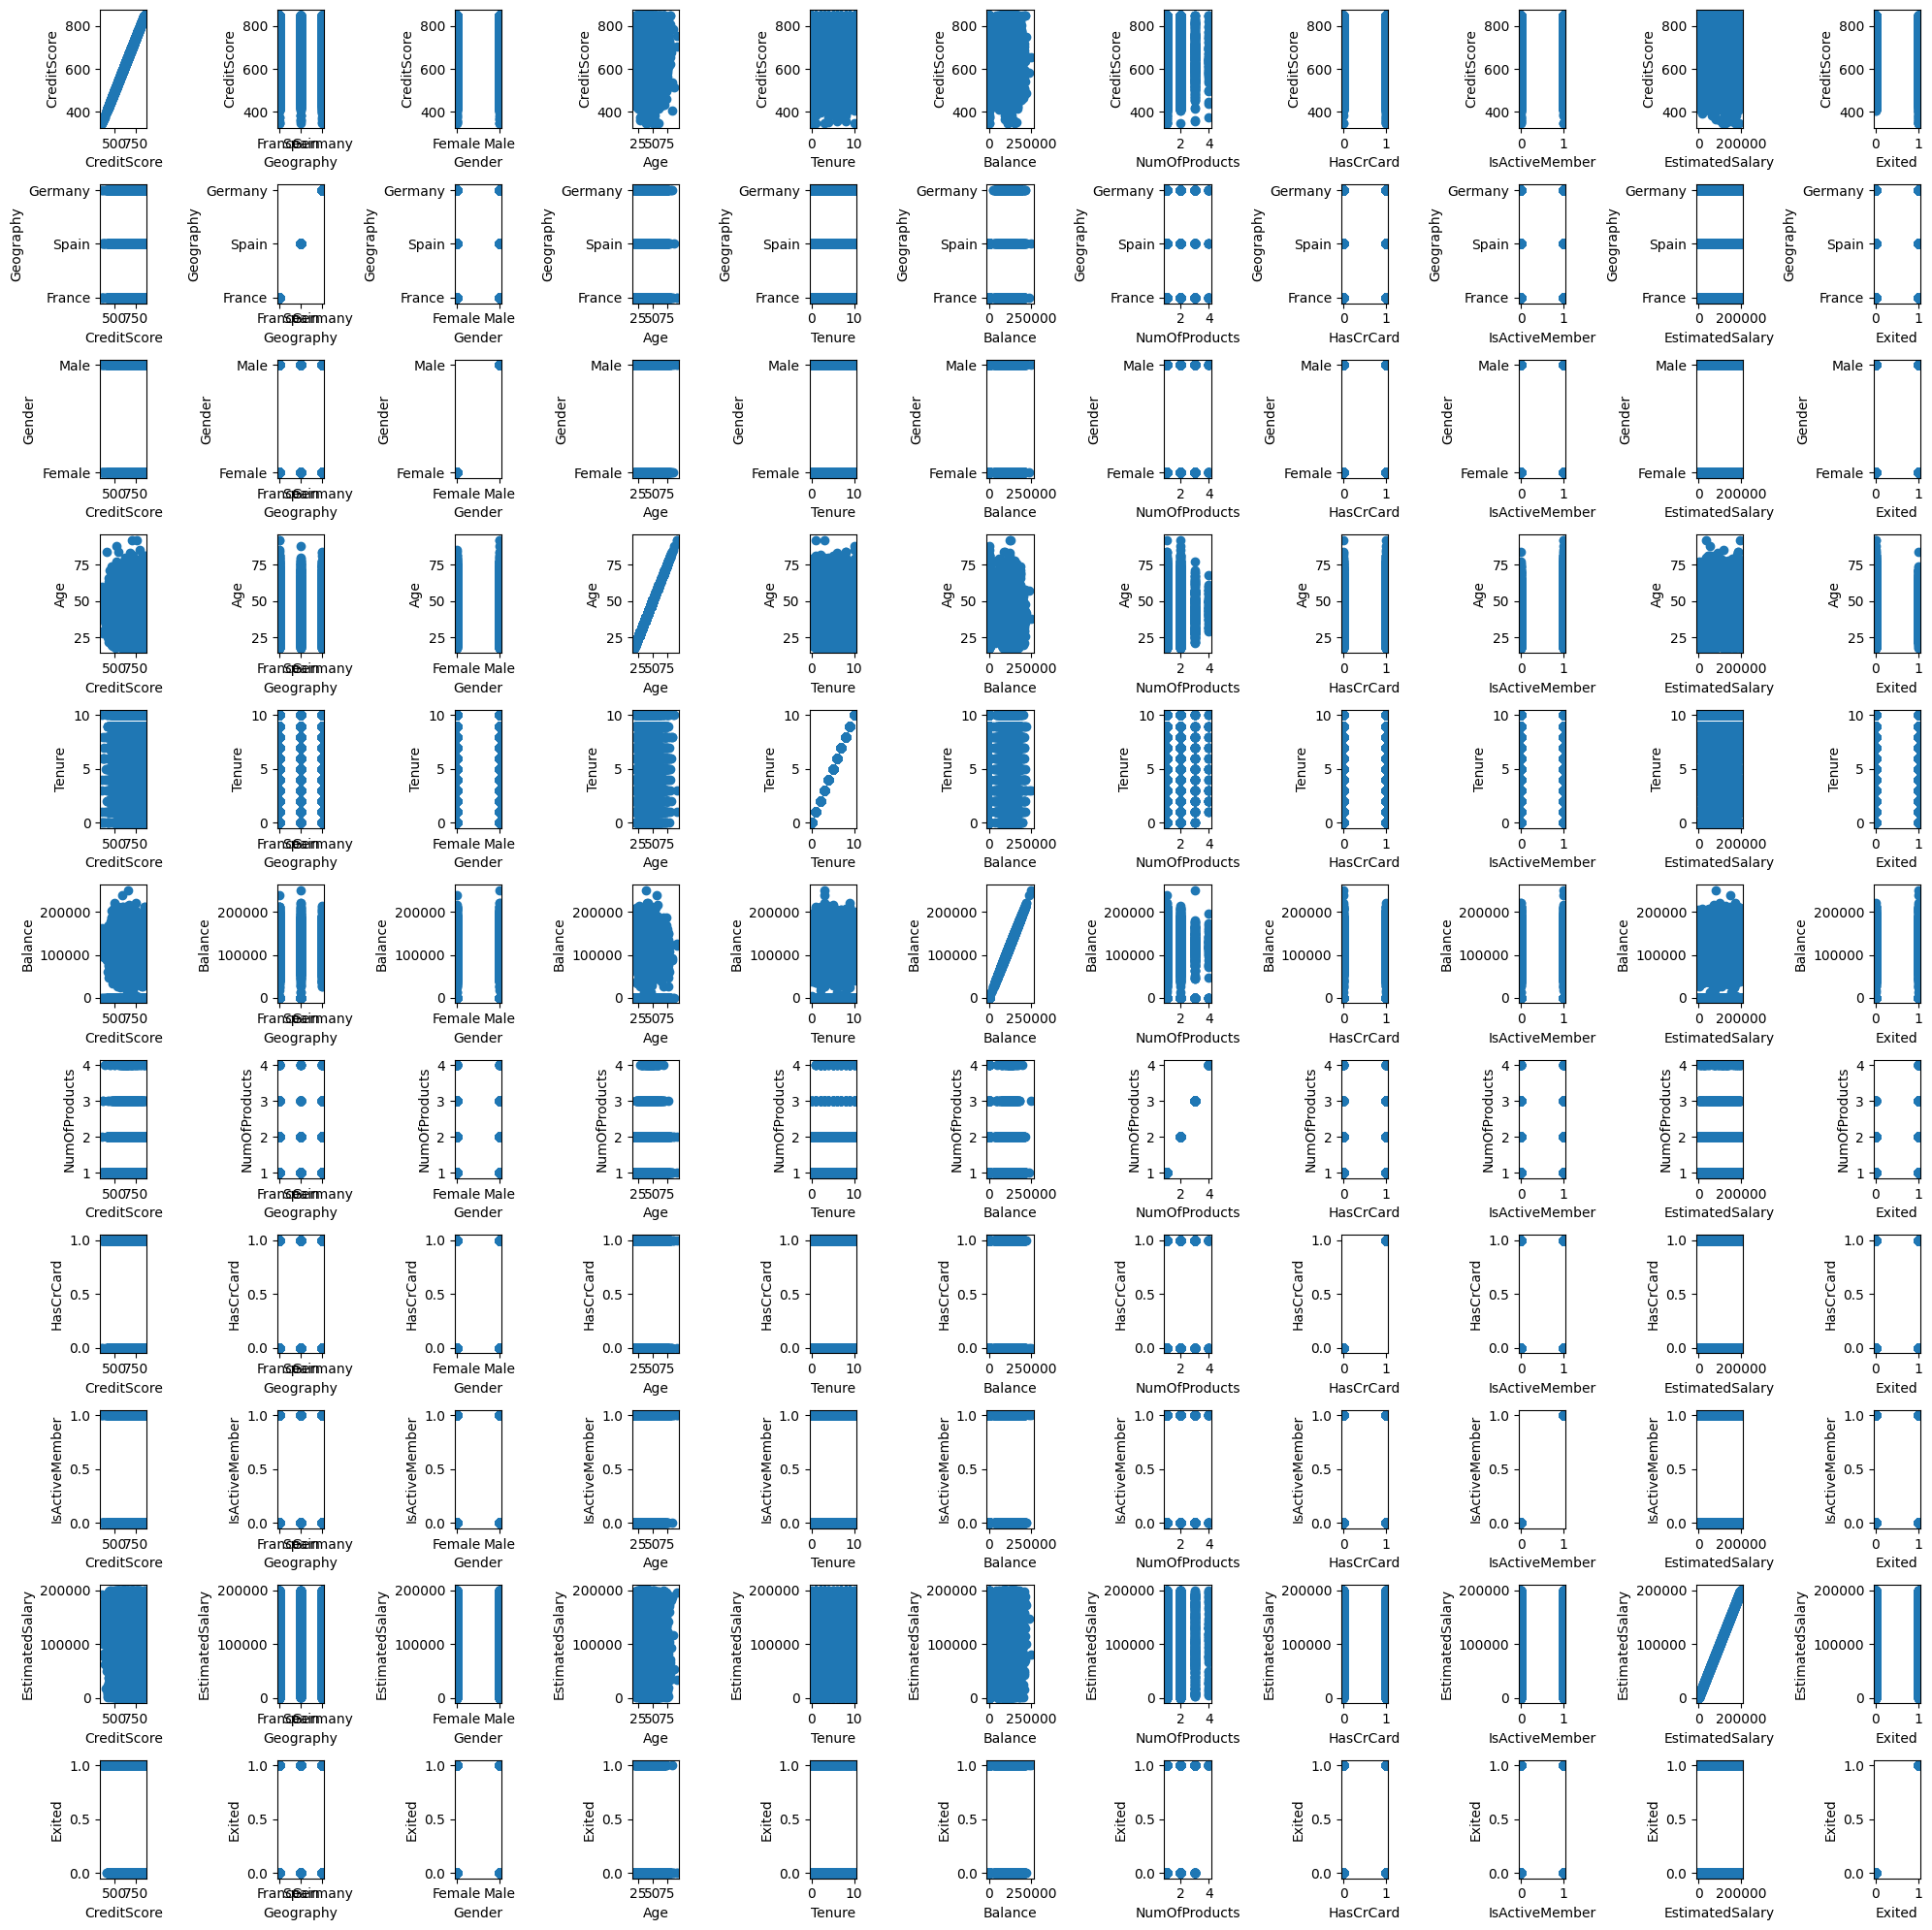

In [ ]:
#Gráficos de dispersion

column_names = df.columns

# Crear la figura y los ejes
fig, axs = plt.subplots(nrows=len(column_names), ncols=len(column_names), figsize=(20,20))

# Recorrer todas las columnas y crear los gráficos de dispersión
for i in range(len(column_names)):
    for j in range(len(column_names)):
        axs[i,j].scatter(df[column_names[j]], df[column_names[i]])
        axs[i,j].set_xlabel(column_names[j])
        axs[i,j].set_ylabel(column_names[i])

# Ajustar los espacios entre los gráficos y mostrar la figura
fig.tight_layout()
plt.show()

## 2. Limpieza y Transformación de datos

**Variables categóricas a numéricas**


In [ ]:
df['Gender'].unique()

array(['Female', 'Male'], dtype=object)

In [ ]:
df['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [ ]:
df2= df.replace({'Female': 0,'Male': 1, "France": 1, "Spain": 2, "Germany": 3})

In [ ]:
df2 # checamos que esta bien

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,1,0,42,2,0.00,1,1,1,101348.88,1
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,502,1,0,42,8,159660.80,3,1,0,113931.57,1
3,699,1,0,39,1,0.00,2,0,0,93826.63,0
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,1,1,39,5,0.00,2,1,0,96270.64,0
9996,516,1,1,35,10,57369.61,1,1,1,101699.77,0
9997,709,1,0,36,7,0.00,1,0,1,42085.58,1
9998,772,3,1,42,3,75075.31,2,1,0,92888.52,1


Dividimos el dataset en dos, una con las variables independientes (X) y el otro con la variable de salida (Y).

In [ ]:
X = df2.drop(["Exited"], axis=1)
Y = df2[["Exited"]]
X #checamos

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,1,0,42,2,0.00,1,1,1,101348.88
1,608,2,0,41,1,83807.86,1,0,1,112542.58
2,502,1,0,42,8,159660.80,3,1,0,113931.57
3,699,1,0,39,1,0.00,2,0,0,93826.63
4,850,2,0,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...,...,...
9995,771,1,1,39,5,0.00,2,1,0,96270.64
9996,516,1,1,35,10,57369.61,1,1,1,101699.77
9997,709,1,0,36,7,0.00,1,0,1,42085.58
9998,772,3,1,42,3,75075.31,2,1,0,92888.52


In [ ]:
Y #checamos

,Exited
0,1
1,0
2,1
3,0
4,0
...,...
9995,0
9996,0
9997,1
9998,1


**Normalización**

Normalizamos las variables "CreditScore", "Age", "Tenure", "Balance" y "EstimatedSalary" ya que son las variables numéricas que tienen valores muy grandes y pequeños que podrían generar algún sesgo.

In [ ]:
#Normalización
from sklearn.preprocessing import StandardScaler

cols_to_normalize = ['CreditScore', 'Age', "Tenure", "Balance", "EstimatedSalary"]

scaler = StandardScaler()

X[cols_to_normalize] = scaler.fit_transform(X[cols_to_normalize])

X

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,-0.326221,1,0,0.293517,-1.041760,-1.225848,1,1,1,0.021886
1,-0.440036,2,0,0.198164,-1.387538,0.117350,1,0,1,0.216534
2,-1.536794,1,0,0.293517,1.032908,1.333053,3,1,0,0.240687
3,0.501521,1,0,0.007457,-1.387538,-1.225848,2,0,0,-0.108918
4,2.063884,2,0,0.388871,-1.041760,0.785728,1,1,1,-0.365276
...,...,...,...,...,...,...,...,...,...,...
9995,1.246488,1,1,0.007457,-0.004426,-1.225848,2,1,0,-0.066419
9996,-1.391939,1,1,-0.373958,1.724464,-0.306379,1,1,1,0.027988
9997,0.604988,1,0,-0.278604,0.687130,-1.225848,1,0,1,-1.008643
9998,1.256835,3,1,0.293517,-0.695982,-0.022608,2,1,0,-0.125231


## 3 y 4. Modelación y Evaluación

Primeramente, separamos el dataset en entrenamiento y prueba

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size= 0.2, random_state=42) #dividimos en 80% train y 20% test

**Árboles de decisión con hiperparámetros default**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
arbol = DecisionTreeClassifier()
arbol.fit(X_train, Y_train)

DecisionTreeClassifier()

[Text(0.7122596803387088, 0.98, 'x[3] <= 0.532\ngini = 0.327\nsamples = 8000\nvalue = [6356, 1644]\nclass = CreditScore'),
 Text(0.5561492575267502, 0.94, 'x[6] <= 2.5\ngini = 0.228\nsamples = 6130\nvalue = [5324, 806]\nclass = CreditScore'),
 Text(0.43718301197341825, 0.9, 'x[6] <= 1.5\ngini = 0.204\nsamples = 5987\nvalue = [5296, 691]\nclass = CreditScore'),
 Text(0.2964255080330788, 0.86, 'x[3] <= -0.04\ngini = 0.3\nsamples = 2952\nvalue = [2410, 542]\nclass = CreditScore'),
 Text(0.18539284582745122, 0.82, 'x[1] <= 2.5\ngini = 0.236\nsamples = 2127\nvalue = [1837, 290]\nclass = CreditScore'),
 Text(0.10291479843108316, 0.78, 'x[5] <= -0.079\ngini = 0.195\nsamples = 1617\nvalue = [1440, 177]\nclass = CreditScore'),
 Text(0.02768664976899384, 0.74, 'x[3] <= -0.803\ngini = 0.336\nsamples = 422\nvalue = [332, 90]\nclass = CreditScore'),
 Text(0.02014887063655031, 0.7, 'x[9] <= 1.693\ngini = 0.225\nsamples = 124\nvalue = [108, 16]\nclass = CreditScore'),
 Text(0.015143737166324436, 0.66

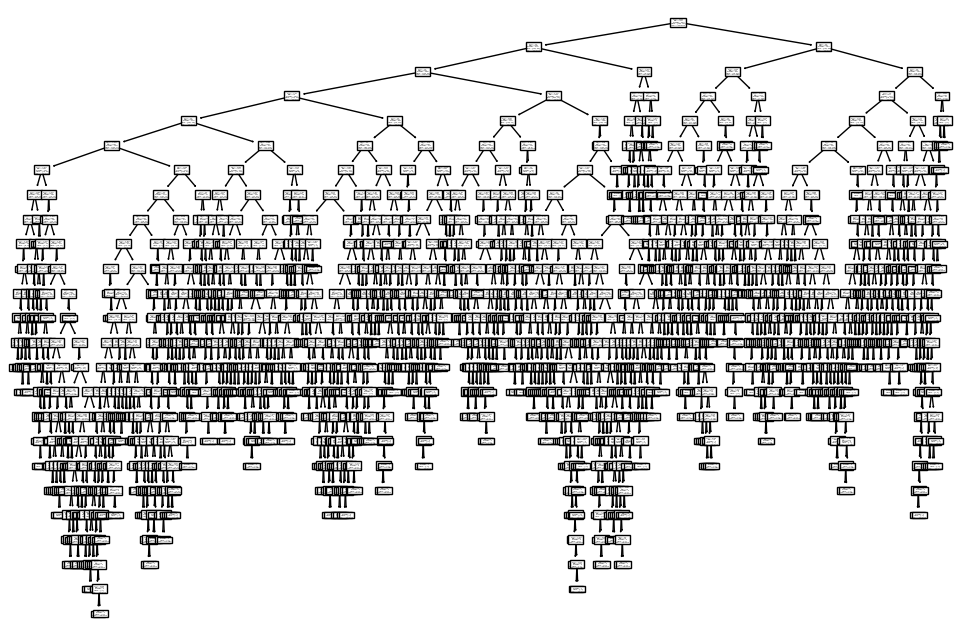

In [ ]:
from sklearn import tree
plt.figure(figsize=(12,8))
tree.plot_tree(arbol.fit(X_train, Y_train), class_names=df.columns)

Probar cómo salió el modelo haciendo la predicción con X_test

In [ ]:
# Realizar predicciones con base en el test set
Y_pred = arbol.predict(X_test)
Y_pred[1:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
ytest = Y_test[1:10]
ytest.T

,4684,1731,4742,4521,6340,576,5202,6363,439
Exited,0,0,0,0,0,0,1,0,0


Tuvo 2 errores de 10.

**Métricas de desempeño**

*  Matriz de confusión

[[1368  239]
 [ 195  198]]


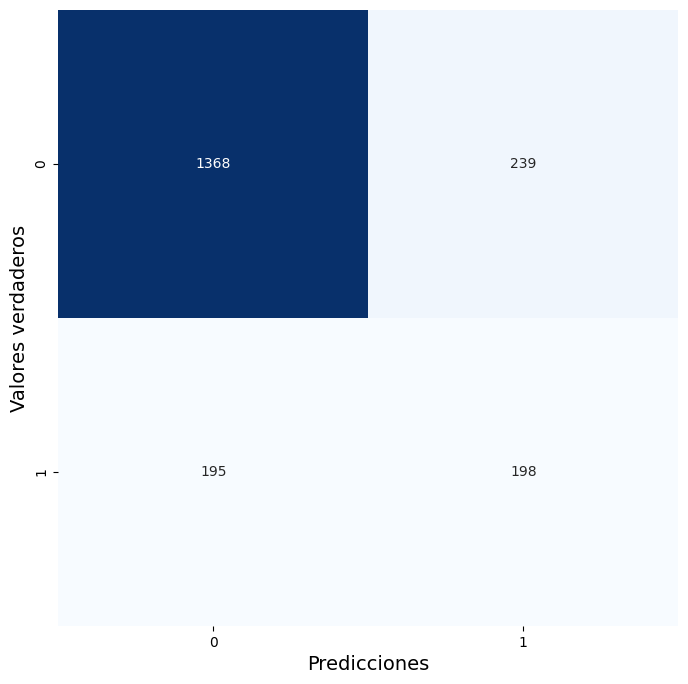

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Calcula la matriz de confusión
cm = confusion_matrix(Y_test, Y_pred)

# Imprime la matriz de confusión
print(cm)

fig, ax = plt.subplots(figsize=(8, 8))
sns.heatmap(ax=ax, data=cm, annot=True, cmap="Blues", fmt=".0f", cbar=False)
plt.xlabel("Predicciones", fontsize=14)
plt.ylabel("Valores verdaderos", fontsize=14)
plt.show()

*  Métricas de desempeño

In [ ]:
# Precisión del modelo
from sklearn.metrics import precision_score
precision = precision_score(Y_test, Y_pred)

# Exactitud del modelo
from sklearn.metrics import accuracy_score
exactitud = accuracy_score(Y_test, Y_pred)

# Sensibilidad del modelo
from sklearn.metrics import recall_score
sensibilidad = recall_score(Y_test, Y_pred)

# Puntaje F1 del modelo
from sklearn.metrics import f1_score
f1 = f1_score(Y_test, Y_pred)

# Curva ROC - AUC del modelo
from sklearn.metrics import roc_auc_score
roc_auc = roc_auc_score(Y_test, Y_pred)

print('Precisión del modelo:', precision*100, "%")
print('Exactitud del modelo:', exactitud*100, "%")
print('Sensibilidad del modelo:', sensibilidad*100, "%")
print('Puntaje F1 del modelo:', f1*100, "%")
print('Curva ROC - AUC del modelo:', roc_auc)

Precisión del modelo: 45.30892448512586 %
Exactitud del modelo: 78.3 %
Sensibilidad del modelo: 50.38167938931297 %
Puntaje F1 del modelo: 47.71084337349397 %
Curva ROC - AUC del modelo: 0.6775462314207403


In [ ]:
res = {
    "Árbol de Decisión": [precision*100, exactitud*100, sensibilidad*100, f1*100, roc_auc]
}

resultados = pd.DataFrame(res, index=["Precisión", "Exactitud", "Sensibilidad", "F1", "Curva ROC - AUC"])
resultados

,Árbol de Decisión
Precisión,45.308924
Exactitud,78.300000
Sensibilidad,50.381679
F1,47.710843
Curva ROC - AUC,0.677546


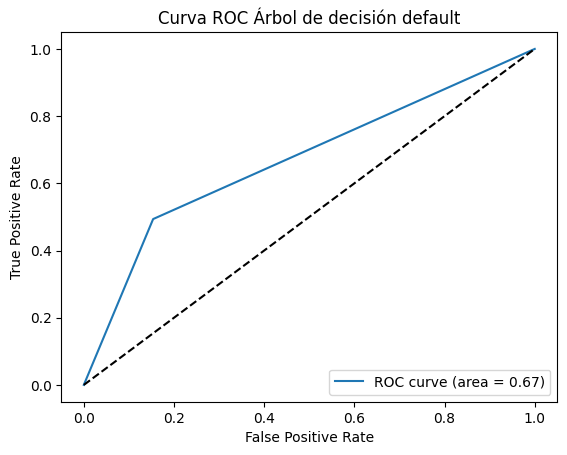

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Genera la curva ROC
fpr, tpr, thresholds = roc_curve(Y_test, Y_pred)

# Área bajo la curva ROC (AUC)
roc_auc = roc_auc_score(Y_test, Y_pred)

# Curva ROC
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC Árbol de decisión default')
plt.legend(loc="lower right")
plt.show()

**Árbol de decisión con hiperparámetros ajustados**

Usamos GridSearchCV para encontrar los mejores hiperparámetros que mejoren el modelo

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

model = DecisionTreeClassifier()

parameters = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [3, 4, 5, 6, 7],
    'min_samples_split': [2, 3, 4]
}

grid_search = GridSearchCV(model, parameters, cv=5, scoring='accuracy')
grid_search.fit(X, Y)

print("Mejores hiperparámetros encontrados: ")
print(grid_search.best_params_)

Mejores hiperparámetros encontrados: 
{'criterion': 'gini', 'max_depth': 6, 'min_samples_split': 4}


In [ ]:
from sklearn.model_selection import train_test_split
X2_train, X2_test, Y2_train, Y2_test = train_test_split(X, Y, test_size= 0.2, random_state=42) #dividimos en 80% train y 20% test

In [ ]:
from sklearn.tree import DecisionTreeClassifier
arbol2 = DecisionTreeClassifier(max_depth= 6, min_samples_split= 4)
arbol2.fit(X2_train, Y2_train)

DecisionTreeClassifier(max_depth=6, min_samples_split=4)

[Text(0.5289473684210526, 0.9285714285714286, 'x[3] <= 0.532\ngini = 0.327\nsamples = 8000\nvalue = [6356, 1644]\nclass = CreditScore'),
 Text(0.29210526315789476, 0.7857142857142857, 'x[6] <= 2.5\ngini = 0.228\nsamples = 6130\nvalue = [5324, 806]\nclass = CreditScore'),
 Text(0.16052631578947368, 0.6428571428571429, 'x[6] <= 1.5\ngini = 0.204\nsamples = 5987\nvalue = [5296, 691]\nclass = CreditScore'),
 Text(0.08421052631578947, 0.5, 'x[3] <= -0.04\ngini = 0.3\nsamples = 2952\nvalue = [2410, 542]\nclass = CreditScore'),
 Text(0.042105263157894736, 0.35714285714285715, 'x[1] <= 2.5\ngini = 0.236\nsamples = 2127\nvalue = [1837, 290]\nclass = CreditScore'),
 Text(0.021052631578947368, 0.21428571428571427, 'x[5] <= -0.079\ngini = 0.195\nsamples = 1617\nvalue = [1440, 177]\nclass = CreditScore'),
 Text(0.010526315789473684, 0.07142857142857142, 'gini = 0.336\nsamples = 422\nvalue = [332, 90]\nclass = CreditScore'),
 Text(0.031578947368421054, 0.07142857142857142, 'gini = 0.135\nsamples = 1

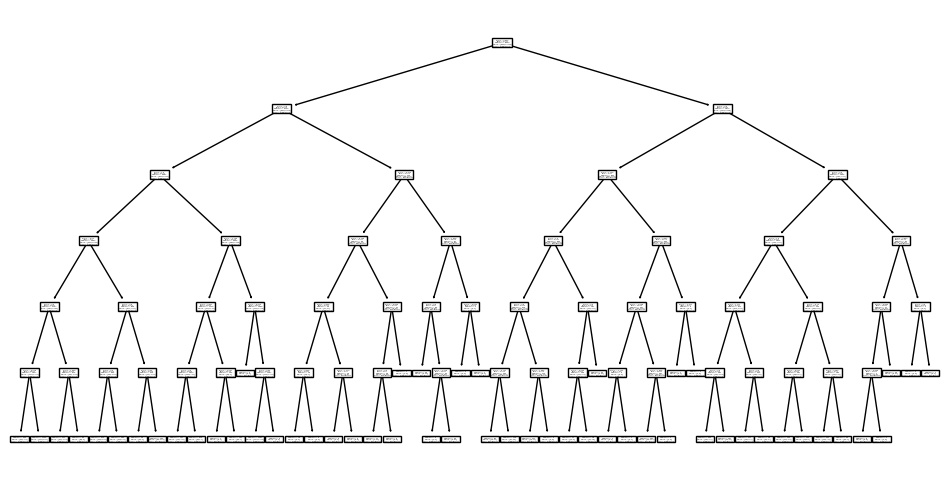

In [ ]:
from sklearn import tree
plt.figure(figsize=(12,6))
tree.plot_tree(arbol2.fit(X2_train, Y2_train), class_names=df.columns)

In [ ]:
# Realizar predicciones con base en el test set
Y2_pred = arbol2.predict(X2_test)
Y2_pred[1:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
y2test = Y2_test[1:10]
y2test.T

,4684,1731,4742,4521,6340,576,5202,6363,439
Exited,0,0,0,0,0,0,1,0,0


Ahora tuvo 9 de 10 predicciones correctas

*  Matriz de confusión

[[1542   65]
 [ 215  178]]


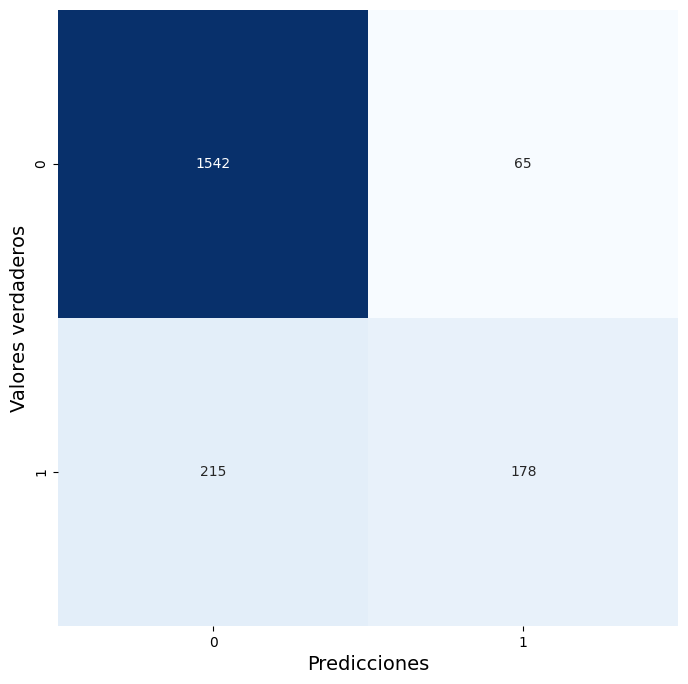

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Calcula la matriz de confusión
cm2 = confusion_matrix(Y2_test, Y2_pred)

# Imprime la matriz de confusión
print(cm2)

fig, ax = plt.subplots(figsize=(8, 8))
sns.heatmap(ax=ax, data=cm2, annot=True, cmap="Blues", fmt=".0f", cbar=False)
plt.xlabel("Predicciones", fontsize=14)
plt.ylabel("Valores verdaderos", fontsize=14)
plt.show()

In [ ]:
# Precisión del modelo
from sklearn.metrics import precision_score
precision2 = precision_score(Y2_test, Y2_pred)

# Exactitud del modelo
from sklearn.metrics import accuracy_score
exactitud2 = accuracy_score(Y2_test, Y2_pred)

# Sensibilidad del modelo
from sklearn.metrics import recall_score
sensibilidad2 = recall_score(Y2_test, Y2_pred)

# Puntaje F1 del modelo
from sklearn.metrics import f1_score
f12 = f1_score(Y2_test, Y2_pred)

# Curva ROC - AUC del modelo
from sklearn.metrics import roc_auc_score
roc_auc2 = roc_auc_score(Y2_test, Y2_pred)

print('Precisión del modelo:', precision2*100, "%")
print('Exactitud del modelo:', exactitud2*100, "%")
print('Sensibilidad del modelo:', sensibilidad2*100, "%")
print('Puntaje F1 del modelo:', f12*100, "%")
print('Curva ROC - AUC del modelo:', roc_auc2)

Precisión del modelo: 73.25102880658436 %
Exactitud del modelo: 86.0 %
Sensibilidad del modelo: 45.29262086513995 %
Puntaje F1 del modelo: 55.9748427672956 %
Curva ROC - AUC del modelo: 0.7062390844128186


In [ ]:
res2 = {
    "Árbol de Decisión Ajustado": [precision2*100, exactitud2*100, sensibilidad2*100, f12*100, roc_auc2]
}

resultados2 = pd.DataFrame(res2, index=["Precisión", "Exactitud", "Sensibilidad", "F1", "Curva ROC - AUC"])
resultados2

,Árbol de Decisión Ajustado
Precisión,73.251029
Exactitud,86.000000
Sensibilidad,45.292621
F1,55.974843
Curva ROC - AUC,0.706239


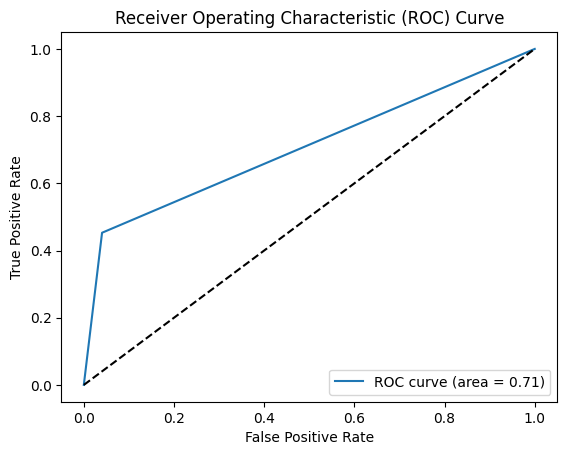

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Genera la curva ROC
fpr, tpr, thresholds = roc_curve(Y2_test, Y2_pred)

# Área bajo la curva ROC (AUC)
roc_auc2 = roc_auc_score(Y2_test, Y2_pred)

# Curva ROC
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc2)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

**KNN con hiperparámetros default**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, Y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier()

In [ ]:
Y_pred_knn = knn.predict(X_test)
Y_pred_knn[1:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 1])

In [ ]:
ytest.T

,4684,1731,4742,4521,6340,576,5202,6363,439
Exited,0,0,0,0,0,0,1,0,0


[[1521   86]
 [ 244  149]]


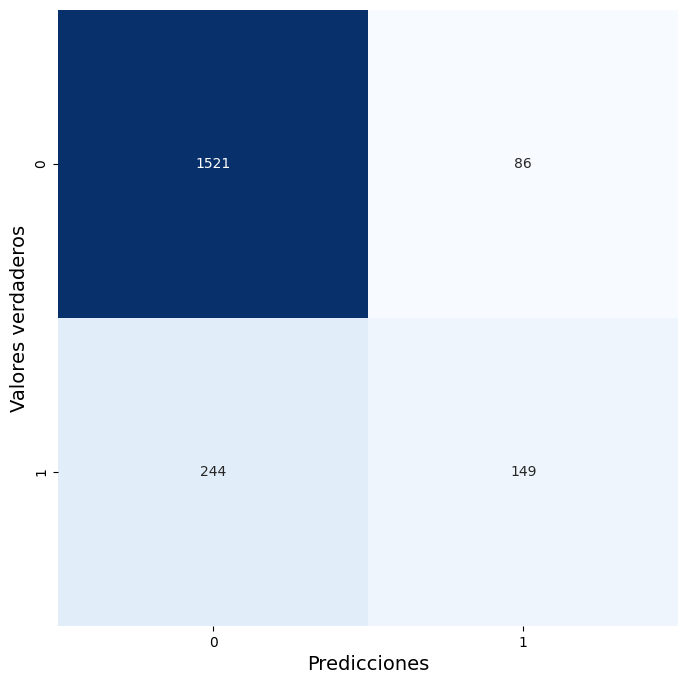

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Calcula la matriz de confusión
cm3 = confusion_matrix(Y_test, Y_pred_knn)

# Imprime la matriz de confusión
print(cm3)

fig, ax = plt.subplots(figsize=(8, 8))
sns.heatmap(ax=ax, data=cm3, annot=True, cmap="Blues", fmt=".0f", cbar=False)
plt.xlabel("Predicciones", fontsize=14)
plt.ylabel("Valores verdaderos", fontsize=14)
plt.show()

In [ ]:
# Precisión del modelo
from sklearn.metrics import precision_score
precision = precision_score(Y_test, Y_pred_knn)

# Exactitud del modelo
from sklearn.metrics import accuracy_score
exactitud = accuracy_score(Y_test, Y_pred_knn)

# Sensibilidad del modelo
from sklearn.metrics import recall_score
sensibilidad = recall_score(Y_test, Y_pred_knn)

# Puntaje F1 del modelo
from sklearn.metrics import f1_score
f1 = f1_score(Y_test, Y_pred_knn)

# Curva ROC - AUC del modelo
from sklearn.metrics import roc_auc_score
roc_auc = roc_auc_score(Y_test, Y_pred_knn)

res = {
    "KNN sin hiperparametros mejorados": [precision*100, exactitud*100, sensibilidad*100, f1*100, roc_auc]
}

resultados = pd.DataFrame(res, index=["Precisión", "Exactitud", "Sensibilidad", "F1", "Curva ROC - AUC"])
resultados

,KNN sin hiperparametros mejorados
Precisión,63.404255
Exactitud,83.500000
Sensibilidad,37.913486
F1,47.452229
Curva ROC - AUC,0.662809


**KNN con hiperparámetros mejorados**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

modelo = KNeighborsClassifier()

param_grid = [{'n_neighbors': [3, 5, 7, 9], 'weights': ['uniform', 'distance'], 'algorithm': ['ball_tree', 'kd_tree', 'brute']}]

grid_search = GridSearchCV(modelo, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, Y_train)
print("Mejores hiperparámetros encontrados: ")
print(grid_search.best_params_)

/usr/local/lib/python3.9/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.9/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.9/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.9/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for exam

Mejores hiperparámetros encontrados: 
{'algorithm': 'ball_tree', 'n_neighbors': 9, 'weights': 'distance'}


/usr/local/lib/python3.9/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn2 = KNeighborsClassifier(algorithm='ball_tree', n_neighbors=9, weights='distance')
knn2.fit(X_train, Y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(algorithm='ball_tree', n_neighbors=9, weights='distance')

In [ ]:
Y_pred_knn2 = knn2.predict(X_test)
Y_pred_knn2[1:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
ytest.T

,4684,1731,4742,4521,6340,576,5202,6363,439
Exited,0,0,0,0,0,0,1,0,0


[[1541   66]
 [ 249  144]]


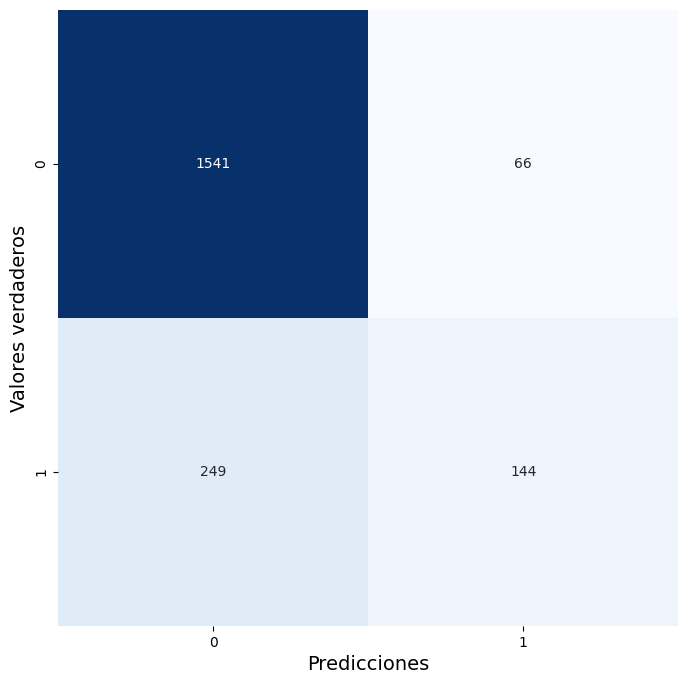

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Calcula la matriz de confusión
cm4 = confusion_matrix(Y_test, Y_pred_knn2)

# Imprime la matriz de confusión
print(cm4)

fig, ax = plt.subplots(figsize=(8, 8))
sns.heatmap(ax=ax, data=cm4, annot=True, cmap="Blues", fmt=".0f", cbar=False)
plt.xlabel("Predicciones", fontsize=14)
plt.ylabel("Valores verdaderos", fontsize=14)
plt.show()

In [ ]:
# Precisión del modelo
from sklearn.metrics import precision_score
precision = precision_score(Y_test, Y_pred_knn2)

# Exactitud del modelo
from sklearn.metrics import accuracy_score
exactitud = accuracy_score(Y_test, Y_pred_knn2)

# Sensibilidad del modelo
from sklearn.metrics import recall_score
sensibilidad = recall_score(Y_test, Y_pred_knn2)

# Puntaje F1 del modelo
from sklearn.metrics import f1_score
f1 = f1_score(Y_test, Y_pred_knn2)

# Curva ROC - AUC del modelo
from sklearn.metrics import roc_auc_score
roc_auc = roc_auc_score(Y_test, Y_pred_knn2)

res = {
    "KNN hiperparametros mejorados": [precision*100, exactitud*100, sensibilidad*100, f1*100, roc_auc]
}

resultados = pd.DataFrame(res, index=["Precisión", "Exactitud", "Sensibilidad", "F1", "Curva ROC - AUC"])
resultados

,KNN hiperparametros mejorados
Precisión,68.571429
Exactitud,84.250000
Sensibilidad,36.641221
F1,47.761194
Curva ROC - AUC,0.662671
